In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
target_y = torch.load('data/pt-cache/target_pred.pt')
query_y = torch.load('data/pt-cache/query_pred_adv.pt')

In [4]:
target_X = torch.load('data/pt-cache/target_X_split.pt')
query_X = torch.load('data/pt-cache/query_X_split.pt')

In [5]:
train_X, test_X, train_y, test_y = train_test_split(
    target_X, target_y-1, test_size=10000, stratify=target_y)

In [6]:
lenet = models.LeNet()

In [7]:
losses = train.train_net(lenet, train_X, train_y, lr=1e-3, batch_size=256, n_epochs=1, device=device)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [8]:
test_pred = lenet.predict(test_X.to(device))
print(classification_report(test_y, test_pred.cpu()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00      1188
           2       1.00      1.00      1.00      1104
           3       1.00      1.00      1.00      1304
           4       1.00      1.00      1.00      1035
           5       1.00      1.00      1.00      1184
           6       1.00      1.00      1.00      1365
           7       1.00      1.00      1.00      1305

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [9]:
torch.save(lenet.state_dict(), 'data/pt-cache/lenet.pt')

In [10]:
train_X, test_X, train_y, test_y = train_test_split(
    query_X, (query_y == 0).float(), test_size=10000, stratify=query_y)

In [11]:
zero_c = models.ZeroClassifier()

In [ ]:
train.train_net(zero_c, train_X, train_y, lr=1e-3, batch_size=256, n_epochs=1, device=device)

In [ ]:
test_pred = zero_c.predict(test_X.to(device))
print(classification_report(test_y, test_pred.cpu()))

In [ ]:
torch.save(zero_c.state_dict(), 'data/pt-cache/zero_c.pt')

In [ ]:
dnet = models.DigitNet()
dnet.lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt'))
dnet.zero_c.load_state_dict(torch.load('data/pt-cache/zero_c.pt'))
torch.save(dnet.state_dict(), 'data/pt-cache/dnet.pt')

In [18]:
test_X = torch.load('data/pt-cache/query_X_split.pt')[:10000].to(device)
test_y = torch.load('data/pt-cache/query_y.pt')[:10000].long().to(device)

In [24]:
test_X = torch.load('data/pt-cache/target_X_split.pt')[:1000].to(device)
test_y = torch.load('data/pt-cache/target_y.pt')[:1000].long().to(device)

In [25]:
dnet = models.DigitNet()
# tmp = models.DigitDiscriminator()
# tmp.load_state_dict(torch.load('data/pt-cache/digit_cgan_disc.pt'))
# dnet.load_state_dict(tmp.dnet.state_dict())
dnet.load_state_dict(torch.load('data/pt-cache/dnet.pt'))
dnet = dnet.to(device)
test_pred = dnet.predict(test_X)
print(classification_report(test_y.cpu(), test_pred.cpu()))

              precision    recall  f1-score   support

           1       0.75      0.91      0.82       125
           2       0.96      0.87      0.91       125
           3       0.99      0.84      0.91       125
           4       0.50      0.48      0.49       125
           5       0.95      0.83      0.89       125
           6       0.92      0.86      0.89       125
           7       0.48      0.54      0.51       125
           8       0.89      0.99      0.94       125

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



In [26]:
dnet.criterion(dnet(test_X), test_y).item()

4.019824504852295

In [27]:
dnet = models.DigitNet()
tmp = models.DigitDiscriminator()
tmp.load_state_dict(torch.load('data/pt-cache/digit_cgan_disc.pt'))
dnet.load_state_dict(tmp.dnet.state_dict())
# dnet.load_state_dict(torch.load('data/pt-cache/dnet.pt'))
dnet = dnet.to(device)
test_pred = dnet.predict(test_X)
print(classification_report(test_y.cpu(), test_pred.cpu()))

              precision    recall  f1-score   support

           1       0.11      0.04      0.06       125
           2       0.21      0.10      0.13       125
           3       0.81      0.66      0.73       125
           4       0.28      0.84      0.42       125
           5       0.93      0.51      0.66       125
           6       0.71      0.16      0.26       125
           7       0.10      0.08      0.09       125
           8       0.48      0.85      0.61       125

    accuracy                           0.41      1000
   macro avg       0.45      0.41      0.37      1000
weighted avg       0.45      0.41      0.37      1000



In [31]:
dnet.criterion(dnet(test_X), test_y).item()

1.7400015592575073

In [36]:
dnet(test_X[:10]).max(dim=-1)

torch.return_types.max(
values=tensor([0.2098, 0.2133, 0.2695, 0.2606, 0.2478, 0.2556, 0.1839, 0.2290, 0.2016,
        0.1836], device='cuda:1', grad_fn=<MaxBackward0>),
indices=tensor([6, 8, 8, 4, 4, 4, 1, 7, 7, 7], device='cuda:1'))

In [32]:
test_pred[:10]

tensor([6, 8, 8, 4, 4, 4, 1, 7, 7, 7], device='cuda:1')

In [33]:
test_y[:10]

tensor([6, 5, 8, 4, 7, 1, 3, 2, 2, 1], device='cuda:1')

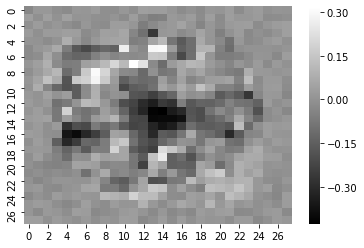

In [17]:
import seaborn as sns
sns.heatmap(zero_c.net.weight.view(28,28).detach().cpu(), cmap='gray')

In [18]:
zero_c.net.bias

Parameter containing:
tensor([-0.0242], device='cuda:1', requires_grad=True)